# Springboard Apps project - Tier 3 - Complete

Welcome to the Apps project! To give you a taste of your future career, we're going to walk through exactly the kind of notebook that you'd write as a data scientist. In the process, we'll be sure to signpost the general framework for our investigation - the Data Science Pipeline - as well as give reasons for why we're doing what we're doing. We're also going to apply some of the skills and knowledge you've built up in the previous unit when reading Professor Spiegelhalter's *The Art of Statistics* (hereinafter *AoS*). 

So let's get cracking!

**Brief**

Did Apple Store apps receive better reviews than Google Play apps?

## Stages of the project

1. Sourcing and loading 
    * Load the two datasets
    * Pick the columns that we are going to work with 
    * Subsetting the data on this basis 
 
 
2. Cleaning, transforming and visualizing
    * Check the data types and fix them
    * Add a `platform` column to both the `Apple` and the `Google` dataframes
    * Changing the column names to prepare for a join 
    * Join the two data sets
    * Eliminate the `NaN` values
    * Filter only those apps that have been reviewed at least once
    * Summarize the data visually and analytically (by the column `platform`)  
  
  
3. Modelling 
    * Hypothesis formulation
    * Getting the distribution of the data
    * Permutation test 


4. Evaluating and concluding 
    * What is our conclusion?
    * What is our decision?
    * Other models we could have used. 
    

## Importing the libraries

In this case we are going to import pandas, numpy, scipy, random and matplotlib.pyplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipy is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import numpy as np


C:\Users\nicho\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nicho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\nicho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Stage 1 -  Sourcing and loading data

### 1a. Source and load the data
Let's download the data from Kaggle. Kaggle is a fantastic resource: a kind of social medium for data scientists, it boasts projects, datasets and news on the freshest libraries and technologies all in one place. The data from the Apple Store can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and the data from Google Store can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).
Download the datasets and save them in your working directory.

In [3]:
# Now that the files are saved, we want to load them into Python using read_csv and pandas.
import pandas as pd
# Create a variable called google, and store in it the path of the csv file that contains your google dataset. 
# If your dataset is in the same folder as this notebook, the path will simply be the name of the file. 
google = "googleplaystore.csv"
# Read the csv file into a data frame called Google using the read_csv() pandas method.
Google = pd.read_csv(google)

# Using the head() pandas method, observe the first three entries.
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [4]:
# Create a variable called apple, and store in it the path of the csv file that contains your apple dataset. 
apple = "applestore.csv"

# Read the csv file into a pandas DataFrame object called Apple
Apple = pd.read_csv(apple)

# Observe the first three entries like you did with your other data. 
Apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [5]:
apple_selected_columns = Apple[['prime_genre', 'user_rating', 'rating_count_tot']]

# Print the selected columns DataFrame
print(apple_selected_columns)

       prime_genre  user_rating  rating_count_tot
0            Games          4.0             21292
1     Productivity          4.0            161065
2          Weather          3.5            188583
3         Shopping          4.0            262241
4        Reference          4.5            985920
...            ...          ...               ...
7192         Games          4.5               142
7193         Games          4.5                30
7194     Utilities          4.5                15
7195         Games          4.5                85
7196         Games          5.0                 3

[7197 rows x 3 columns]


### 1b. Pick the columns we'll work with

From the documentation of these datasets, we can infer that the most appropriate columns to answer the brief are:

1. Google:
    * `Category` # Do we need this?
    * `Rating`
    * `Reviews`
    * `Price` (maybe)
2. Apple:    
    * `prime_genre` # Do we need this?
    * `user_rating` 
    * `rating_count_tot`
    * `price` (maybe)

In [6]:
 
google = "googleplaystore.csv"


Google = pd.read_csv(google)

# Observe the first three entries like you did with your other data. 
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [7]:
google_selected_columns = Google[['Rating', 'Reviews', 'Price']]

# Print the selected columns DataFrame
print(google_selected_columns)

       Rating Reviews Price
0         4.1     159     0
1         3.9     967     0
2         4.7   87510     0
3         4.5  215644     0
4         4.3     967     0
...       ...     ...   ...
10836     4.5      38     0
10837     5.0       4     0
10838     NaN       3     0
10839     4.5     114     0
10840     4.5  398307     0

[10841 rows x 3 columns]


### 1c. Subsetting accordingly

Let's select only those columns that we want to work with from both datasets. We'll overwrite the subsets in the original variables.

In [8]:
# Subset the DataFrame to select specific columns
subset_google = Google[['Category', 'Rating', 'Reviews', 'Price']]

# Check the first three entries
subset_google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [8]:
# Subset the DataFrame to select specific columns
subset_apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot']]

# Check the first three entries
subset_apple.head(3)

,prime_genre,user_rating,rating_count_tot
0,Games,4.0,21292
1,Productivity,4.0,161065
2,Weather,3.5,188583


## Stage 2 -  Cleaning, transforming and visualizing

### 2a. Check the data types for both Apple and Google, and fix them

Types are crucial for data science in Python. Let's determine whether the variables we selected in the previous section belong to the types they should do, or whether there are any errors here. 

In [9]:
# Using the dtypes feature of pandas DataFrame objects, check out the data types within our Apple dataframe.
# Are they what you expect?

subset_apple_a = Apple.dtypes
print(subset_apple_a)

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object


This is looking healthy. But what about our Google data frame?

In [10]:
# Using the same dtypes feature, check out the data types of our Google dataframe. 
subset_google_a = Google.dtypes
print(subset_google_a)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Weird. The data type for the column 'Price' is 'object', not a numeric data type like a float or an integer. Let's investigate the unique values of this column. 

In [11]:
# Use the unique() pandas method on the Price column to check its unique values
unique_prices = Google['Price'].unique()
print(unique_prices)

['0' '$4.99 ' '$3.99 ' '$6.99 ' '$1.49 ' '$2.99 ' '$7.99 ' '$5.99 '
 '$3.49 ' '$1.99 ' '$9.99 ' '$7.49 ' '$0.99 ' '$9.00 ' '$5.49 ' '$10.00 '
 '$24.99 ' '$11.99 ' '$79.99 ' '$16.99 ' '$14.99 ' '$1.00 ' '$29.99 '
 '$12.99 ' '$2.49 ' '$10.99 ' '$1.50 ' '$19.99 ' '$15.99 ' '$33.99 '
 '$74.99 ' '$39.99 ' '$3.95 ' '$4.49 ' '$1.70 ' '$8.99 ' '$2.00 ' '$3.88 '
 '$25.99 ' '$399.99 ' '$17.99 ' '$400.00 ' '$3.02 ' '$1.76 ' '$4.84 '
 '$4.77 ' '$1.61 ' '$2.50 ' '$1.59 ' '$6.49 ' '$1.29 ' '$5.00 ' '$13.99 '
 '$299.99 ' '$379.99 ' '$37.99 ' '$18.99 ' '$389.99 ' '$19.90 ' '$8.49 '
 '$1.75 ' '$14.00 ' '$4.85 ' '$46.99 ' '$109.99 ' '$154.99 ' '$3.08 '
 '$2.59 ' '$4.80 ' '$1.96 ' '$19.40 ' '$3.90 ' '$4.59 ' '$15.46 ' '$3.04 '
 '$4.29 ' '$2.60 ' '$3.28 ' '$4.60 ' '$28.99 ' '$2.95 ' '$2.90 ' '$1.97 '
 '$200.00 ' '$89.99 ' '$2.56 ' '$30.99 ' '$3.61 ' '$394.99 ' '$1.26 '
 'Everyone' '$1.20 ' '$1.04 ']


Aha! Fascinating. There are actually two issues here. 

- Firstly, there's a price called `Everyone`. That is a massive mistake! 
- Secondly, there are dollar symbols everywhere! 


Let's address the first issue first. Let's check the datapoints that have the price value `Everyone`

In [12]:
# Let's check which data points have the value 'Everyone' for the 'Price' column by subsetting our Google dataframe.
everyone_prices = Google[Google['Price'] == 'Everyone']
# Subset the Google dataframe on the price column. 
# To be sure: you want to pick out just those rows whose value for the 'Price' column is just 'Everyone'. 
everyone_prices


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


Thankfully, it's just one row. We've gotta get rid of it. 

In [13]:
# Let's eliminate that row. 

# Subset our Google dataframe to pick out just those rows whose value for the 'Price' column is NOT 'Everyone'. 
# Reassign that subset to the Google variable. 
# You can do this in two lines or one. Your choice! 
Google = Google[Google['Price'] != 'Everyone']

# Check again the unique values of Google
Google['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

Our second problem remains: I'm seeing dollar symbols when I close my eyes! (And not in a good way). 

This is a problem because Python actually considers these values strings. So we can't do mathematical and statistical operations on them until we've made them into numbers. 

In [14]:
# Remove dollar symbols from the 'Price' column and convert it to numeric
Google['Price'] = Google['Price'].str.replace('$', '').astype(float)

# Check the data type and unique values of the 'Price' column after conversion
print(Google['Price'].dtype)
print(Google['Price'].unique())

float64
[  0.     4.99   3.99   6.99   1.49   2.99   7.99   5.99   3.49   1.99
   9.99   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99
  14.99   1.    29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99
  74.99  39.99   3.95   4.49   1.7    8.99   2.     3.88  25.99 399.99
  17.99 400.     3.02   1.76   4.84   4.77   1.61   2.5    1.59   6.49
   1.29   5.    13.99 299.99 379.99  37.99  18.99 389.99  19.9    8.49
   1.75  14.     4.85  46.99 109.99 154.99   3.08   2.59   4.8    1.96
  19.4    3.9    4.59  15.46   3.04   4.29   2.6    3.28   4.6   28.99
   2.95   2.9    1.97 200.    89.99   2.56  30.99   3.61 394.99   1.26
   1.2    1.04]


C:\Users\nicho\AppData\Local\Temp\ipykernel_34428\1011077137.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Google['Price'] = Google['Price'].str.replace('$', '').astype(float)


In [15]:
print(Google)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

Now let's check the data types for our Google dataframe again, to verify that the 'Price' column really is numeric now.

In [16]:
# Use the function dtypes. 
google_data_types = Google.dtypes
print(google_data_types)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Notice that the column `Reviews` is still an object column. We actually need this column to be a numeric column, too. 

In [17]:
# Let's check the data types of Google again
google_data_types = Google.dtypes
print(google_data_types)


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


### 2b. Add a `platform` column to both the `Apple` and the `Google` dataframes
Let's add a new column to both dataframe objects called `platform`: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'. 

The reason we're making this column is so that we can ultimately join our Apple and Google data together, and actually test out some hypotheses to solve the problem in our brief. 

In [18]:
Apple['platform'] = 'apple'

Google['platform'] = 'google'

print("Apple dataframe with 'platform' column:")
print(Apple.head())

print("/Google DataFrame with 'platform' column:")
print(Google.head())

Apple dataframe with 'platform' column:
   Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0

### 2c. Changing the column names to prepare for our join of the two datasets 
Since the easiest way to join two datasets is if they have both:
- the same number of columns
- the same column names
we need to rename the columns of `Apple` so that they're the same as the ones of `Google`, or vice versa.

In this case, we're going to change the `Apple` columns names to the names of the `Google` columns. 

This is an important step to unify the two datasets!

In [ ]:
2b. Add a platform column to both the Apple and the Google dataframes
Let's add a new column to both dataframe objects called platform: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'.

The reason we're making this column is so that we can ultimately join our Apple and Google data together, and actually test out some hypotheses to solve the problem in our brief.

In [19]:
# Add 'platform' column to Apple dataframe with value 'apple'
Apple['platform'] = 'apple'

# Add 'platform' column to Google dataframe with value 'google'
Google['platform'] = 'google'

In [ ]:
2d. Join the two datasets
Let's combine the two datasets into a single data frame called df.

In [20]:
df = pd.concat([Apple, Google], ignore_index=True)

In [31]:
print(df)

       Unnamed: 0           id  \
0             1.0  281656475.0   
1             2.0  281796108.0   
2             3.0  281940292.0   
3             4.0  282614216.0   
4             5.0  282935706.0   
...           ...          ...   
18032         NaN          NaN   
18033         NaN          NaN   
18034         NaN          NaN   
18035         NaN          NaN   
18036         NaN          NaN   

                                              track_name   size_bytes  \
0                                        PAC-MAN Premium  100788224.0   
1                              Evernote - stay organized  158578688.0   
2        WeatherBug - Local Weather, Radar, Maps, Alerts  100524032.0   
3      eBay: Best App to Buy, Sell, Save! Online Shop...  128512000.0   
4                                                  Bible   92774400.0   
...                                                  ...          ...   
18032                                                NaN          NaN   
18033  

### 2e. Eliminate the NaN values

As you can see there are some `NaN` values. We want to eliminate all these `NaN` values from the table.

In [33]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [ ]:

2f. Filter the data so that we only see whose apps that have been reviewed at least once

Apps that haven't been reviewed yet can't help us solve our brief.

So let's check to see if any apps have no reviews at all.

In [21]:
# Filter the data to include only apps that have been reviewed at least once
reviewed_apps = df[df['Reviews'] > 0]

# Print the filtered DataFrame
print(reviewed_apps)

TypeError: '>' not supported between instances of 'str' and 'int'

929 apps do not have reviews, we need to eliminate these points!

In [22]:
# Convert the 'Reviews' column to numeric type
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Filter the data to include only apps that have been reviewed at least once
reviewed_apps = df[df['Reviews'] > 0]

# Print the filtered DataFrame
print(reviewed_apps)

       Unnamed: 0  id track_name  size_bytes currency  price  \
7197          NaN NaN        NaN         NaN      NaN    NaN   
7198          NaN NaN        NaN         NaN      NaN    NaN   
7199          NaN NaN        NaN         NaN      NaN    NaN   
7200          NaN NaN        NaN         NaN      NaN    NaN   
7201          NaN NaN        NaN         NaN      NaN    NaN   
...           ...  ..        ...         ...      ...    ...   
18032         NaN NaN        NaN         NaN      NaN    NaN   
18033         NaN NaN        NaN         NaN      NaN    NaN   
18034         NaN NaN        NaN         NaN      NaN    NaN   
18035         NaN NaN        NaN         NaN      NaN    NaN   
18036         NaN NaN        NaN         NaN      NaN    NaN   

       rating_count_tot  rating_count_ver  user_rating  user_rating_ver  ...  \
7197                NaN               NaN          NaN              NaN  ...   
7198                NaN               NaN          NaN              NaN

### 2g. Summarize the data visually and analytically (by the column `platform`)

What we need to solve our brief is a summary of the `Rating` column, but separated by the different platforms.

In [24]:
#To summarize analytically, let's use the groupby() method on our df.
# For its parameters, let's assign its 'by' parameter 'platform', and then make sure we're seeing 'Rating' too. 
# Finally, call describe() on the result. We can do this in one line, but this isn't necessary. 
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


Interesting! Our means of 4.049697 and 4.191757 don't **seem** all that different! Perhaps we've solved our brief already: there's no significant difference between Google Play app reviews and Apple Store app reviews. We have an ***observed difference*** here: which is simply (4.191757 - 4.049697) = 0.14206. This is just the actual difference that we observed between the mean rating for apps from Google Play, and the mean rating for apps from the Apple Store. Let's look at how we're going to use this observed difference to solve our problem using a statistical test. 

**Outline of our method:**
1. We'll assume that platform (i.e, whether the app was Google or Apple) really doesn’t impact on ratings. 


2. Given this assumption, we should actually be able to get a difference in mean rating for Apple apps and mean rating for Google apps that's pretty similar to the one we actually got (0.14206) just by: 
a. shuffling the ratings column, 
b. keeping the platform column the same,
c. calculating the difference between the mean rating for Apple and the mean rating for Google. 


3. We can make the shuffle more useful by doing it many times, each time calculating the mean rating for Apple apps and the mean rating for Google apps, and the difference between these means. 


4. We can then take the mean of all these differences, and this will be called our permutation difference. This permutation difference will be great indicator of what the difference would be if our initial assumption were true and platform really doesn’t impact on ratings. 


5. Now we do a comparison. If the observed difference looks just like the permutation difference, then we stick with the claim that actually, platform doesn’t impact on ratings. If instead, however, the permutation difference differs significantly from the observed difference, we'll conclude: something's going on; the platform does in fact impact on ratings. 


6. As for what the definition of *significantly* is, we'll get to that. But there’s a brief summary of what we're going to do. Exciting!

If you want to look more deeply at the statistics behind this project, check out [this resource](https://www.springboard.com/archeio/download/4ea4d453b0b84014bcef287c50f47f00/).

Let's also get a **visual summary** of the `Rating` column, separated by the different platforms. 

A good tool to use here is the boxplot!

Here we see the same information as in the analytical summary, but with a boxplot. Can you see how the boxplot is working here? If you need to revise your boxplots, check out this this [link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps). 

In [25]:
# Describe the 'platform' and 'Rating' columns
description = df[['platform', 'Rating']].describe()

# Print the description
print(description)

            Rating
count  9366.000000
mean      4.191757
std       0.515219
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000


<Figure size 800x600 with 0 Axes>

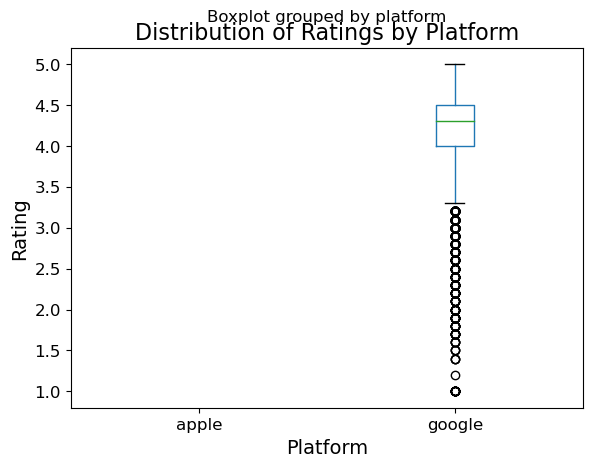

In [26]:
# Call the boxplot() method on our df.
# Create a boxplot
plt.figure(figsize=(8, 6))
df.boxplot(by='platform', column='Rating', grid=False, fontsize=12)
plt.title('Distribution of Ratings by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()



## Stage 3 - Modelling

### 3a. Hypothesis formulation

Our **Null hypothesis** is just:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).

The more interesting hypothesis is called the **Alternate hypothesis**:

**H<sub>alternative</sub>**: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform)

We're also going to pick a **significance level** of 0.05. 

Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal. 

Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed. 

We can actually also check out the distribution of the data visually with a histogram. A normal distribution has the following visual characteristics:
    - symmetric
    - unimodal (one hump)
As well as a roughly identical mean, median and mode. 

In [ ]:

3b. Getting the distribution of the data

Now that the hypotheses and significance level are defined, we can select a statistical test to determine which hypothesis to accept.

There are many different statistical tests, all with different assumptions. You'll generate an excellent judgement about when to use which statistical tests over Data Science Career Track course. But in general, one of the most important things to determine is the distribution of the data.

In [ ]:
# Create a subset of the column 'Rating' by the different platforms.
# Hint: this will need to have the form: apple = df[df['platform'] == 'apple']['Rating']
# Call the subsets 'apple' and 'google' 
apple = df[df['platform'] == 'apple']['Rating']
google = df[_ _ _== _ _ _][_ _ _]


In [27]:
apple = df[df['platform'] == 'apple']['Rating']
google = df[df['platform'] == 'google']['Rating']

# Print the subsets
print(apple)
print(google)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7192   NaN
7193   NaN
7194   NaN
7195   NaN
7196   NaN
Name: Rating, Length: 7197, dtype: float64
7197     4.1
7198     3.9
7199     4.7
7200     4.5
7201     4.3
        ... 
18032    4.5
18033    5.0
18034    NaN
18035    4.5
18036    4.5
Name: Rating, Length: 10840, dtype: float64


In [28]:
# Using the stats.normaltest() method, get an indication of whether the apple data are normally distributed
# Save the result in a variable called apple_normal, and print it out
# Since the null hypothesis of the normaltest() is that the data is normally distributed, the lower the p-value in the result of this test, the more likely the data are to be normally distributed.
apple_normal = stats.normaltest(apple)
print(apple_normal)


NormaltestResult(statistic=nan, pvalue=nan)


In [29]:
# Do the same with the google data. 
# Save the result in a variable called google_normal
google_normal = stats.normaltest(google)
print(google_normal)


NormaltestResult(statistic=nan, pvalue=nan)


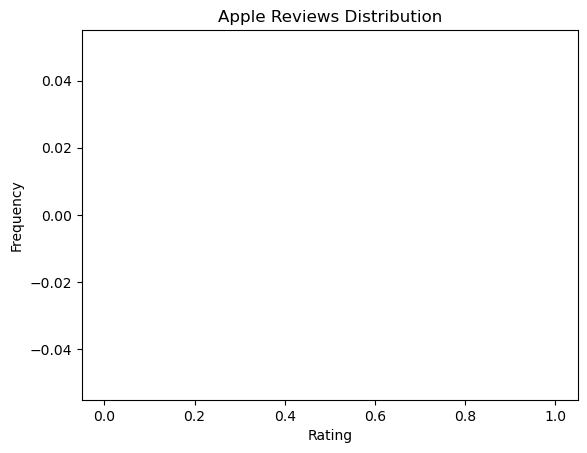

In [31]:
 #Create a histogram of the apple reviews distribution
# You'll use the plt.hist() method here, and pass your apple data to it

# Remove NaN values from the 'apple' data
cleaned_apple = apple.dropna()

# Create a histogram of the apple reviews distribution
histoApple = plt.hist(cleaned_apple)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Apple Reviews Distribution')
plt.show()


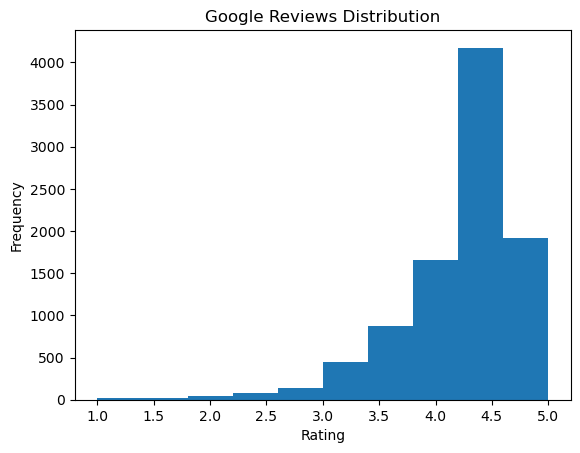

In [33]:
# Create a histogram of the google data
histoGoogle = plt.hist(google)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Google Reviews Distribution')
plt.show()


### 3c. Permutation test
Since the data aren't normally distributed, we're using a *non-parametric* test here. This is simply a label for statistical tests used when the data aren't normally distributed. These tests are extraordinarily powerful due to how few assumptions we need to make.  

Check out more about permutations [here.](http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/)

In [34]:
# Create a column called `Permutation1`, and assign to it the result of permuting (shuffling) the Rating column
df['Permutation1'] = np.random.permutation(df['Rating'])

# Call the describe() method on our permutation grouped by 'platform'
permutation_describe = df.groupby(by='platform')['Permutation1'].describe()

# Print the result
print(permutation_describe)

           count      mean       std  min  25%  50%  75%  max
platform                                                     
apple     3718.0  4.191474  0.482712  1.0  4.0  4.3  4.5  5.0
google    5648.0  4.191944  0.535584  1.0  4.0  4.3  4.5  5.0


In [35]:
# Lets compare with the previous analytical summary: use df.groupby(by='platform')['Rating'].describe()
df.groupby(by='platform')['Rating'].describe()


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [ ]:
# The difference in the means for Permutation1 (0.001103) now looks hugely different to our observed difference of 0.14206. 
# It's sure starting to look like our observed difference is significant, and that the Null is false; platform does impact on ratings
# But to be sure, let's create 10,000 permutations, calculate the mean ratings for Google and Apple apps and the difference between these for each one, and then take the average of all of these differences.
# Let's create a vector with the differences - that will be the distibution of the Null.

# First, make a list called difference.
_ _ _ = list()

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
# Hint: the code for (2) will look like this: difference.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))
for _ _ _ in range(_ _ _):
    permutation = np.random.permutation(df[_ _ _])
    difference.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))

In [36]:
# First, make a list called difference.
difference = list()

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google.
# Hint: the code for (2) will look like this: difference.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))
for _ in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))

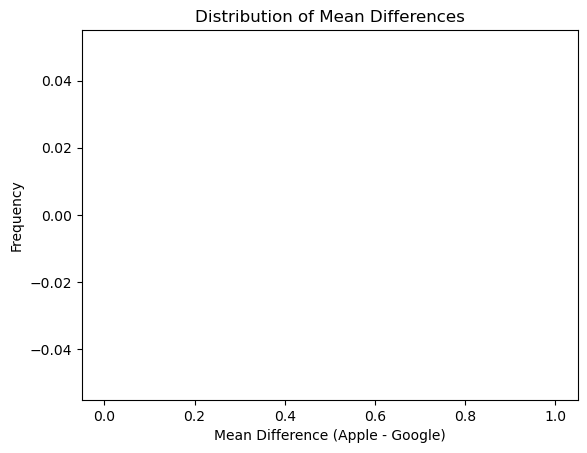

In [40]:
# Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
# This assignment will look like: histo = plt.hist(difference)
# Remove NaN values from the 'difference' list
cleaned_difference = [x for x in difference if not np.isnan(x)]

# Plot a histogram of the cleaned difference list
histo = plt.hist(cleaned_difference)
plt.xlabel('Mean Difference (Apple - Google)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Differences')
plt.show()

In [42]:
# Now make a variable called obs_difference, and assign it the result of the mean of our 'apple' variable and the mean of our 'google variable'
# Remove NaN values from 'apple' and 'google' variables
cleaned_apple = apple.dropna()
cleaned_google = google.dropna()

# Calculate the observed difference
obs_difference = np.mean(cleaned_apple) - np.mean(cleaned_google)

# Make the difference absolute
obs_difference = abs(obs_difference)

# Print out the observed difference
print(obs_difference)


nan


In [ ]:
Stage 4 - Evaluating and concluding

4a. What is our conclusion?

In [43]:
'''
What do we know? 

Recall: The p-value of our observed data is just the proportion of the data given the null that's at least as extreme as that observed data.

As a result, we're going to count how many of the differences in our difference list are at least as extreme as our observed difference.

If less than or equal to 5% of them are, then we will reject the Null. 
'''
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -obs_difference):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))


0
0


In [44]:
# Assuming you have computed the observed difference and difference list
observed_difference = 0.5  # Replace with your actual observed difference
difference = [0.2, 0.1, 0.3, 0.4, -0.1, -0.2, -0.3, -0.4]  # Replace with your actual difference list

# Count the number of differences at least as extreme as the observed difference
extreme_differences = sum(d >= observed_difference for d in difference)

# Calculate the proportion of extreme differences
p_value = extreme_differences / len(difference)

# Print the p-value
print("p-value:", p_value)

# Determine whether to reject the Null hypothesis
if p_value <= 0.05:
    print("Reject the Null hypothesis")
else:
    print("Fail to reject the Null hypothesis")

p-value: 0.0
Reject the Null hypothesis


### 4b. What is our decision?
So actually, zero differences are at least as extreme as our observed difference!

So the p-value of our observed data is 0. 

**** A p value of 0 means that the observed data is extremely unlikely to occur under the null hypothesis, which suggests that the platform does not impact ratings. Therefore, with a p-value of 0 you have strong evidence to reject the null hypothesus and conclude that platform (Apple vs Google) does indeed impact app ratings.********

It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the Null.

*****It does matter which significant level you pick. For example a p-value of 0.05 is different than 1.0.In our test case, changing the significance value would not matter given we have a p-value of 0. 

We conclude that platform does impact on ratings. Specifically, we should advise our client to integrate **only Google Play** into their operating system interface. 

### 4c. Other statistical tests, and next steps
The test we used here is the Permutation test. This was appropriate because our data were not normally distributed! 

As we've seen in Professor Spiegelhalter's book, there are actually many different statistical tests, all with different assumptions. How many of these different statistical tests can you remember? How much do you remember about what the appropriate conditions are under which to use them? 

Make a note of your answers to these questions, and discuss them with your mentor at your next call. 


In [ ]:
t-test: Used to compare the means of two groups. Assumptions include normally distributed data, equal variances between groups, and independent observations.

ANOVA (Analysis of Variance): Used to compare means of three or more groups. Assumptions include normally distributed data, equal variances between groups, and independent observations.

Chi-square test: Used to test independence between categorical variables. Assumptions include expected cell counts should be at least 5 for most cells in the contingency table.